<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Открываем-и-изучаем-файл" data-toc-modified-id="Открываем-и-изучаем-файл-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открываем и изучаем файл</a></span></li><li><span><a href="#Ресемплирование-данных" data-toc-modified-id="Ресемплирование-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ресемплирование данных</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Тренд-&quot;Trend&quot;" data-toc-modified-id="Тренд-&quot;Trend&quot;-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Тренд <code>"Trend"</code></a></span></li><li><span><a href="#Cезонность-&quot;Seasonality&quot;" data-toc-modified-id="Cезонность-&quot;Seasonality&quot;-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cезонность <code>"Seasonality"</code></a></span></li><li><span><a href="#Остаток-&quot;Residuals&quot;" data-toc-modified-id="Остаток-&quot;Residuals&quot;-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Остаток <code>"Residuals"</code></a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Модель-baseline" data-toc-modified-id="Модель-baseline-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель <code>baseline</code></a></span></li><li><span><a href="#Функция-обучающих-признаков" data-toc-modified-id="Функция-обучающих-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Функция обучающих признаков</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Линейная регрессия</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Функция-main_model" data-toc-modified-id="Функция-main_model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Функция <code>main_model</code></a></span></li><li><span><a href="#Модель-Lasso" data-toc-modified-id="Модель-Lasso-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Модель <code>Lasso</code></a></span></li><li><span><a href="#Модель-Ridge" data-toc-modified-id="Модель-Ridge-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Модель <code>Ridge</code></a></span></li><li><span><a href="#Анализ-результатов" data-toc-modified-id="Анализ-результатов-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ результатов</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Открываем и изучаем файл

Импортируем необходимые в работе библиотеки и модули

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# откроем датасет и сохраним его в новой переменной
df = pd.read_csv('/datasets/taxi.csv', index_col='datetime', parse_dates=[0])

In [3]:
# выведем первые пять строк таблицы
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
# посмотрим на форму датасета
df.shape

(26496, 1)

In [5]:
# Выведем информацию по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [6]:
# Посмотрим на список характерных значений
df.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


### Ресемплирование данных

Произведем ресемплирование данных по одному часу. Так как предсказываем количество заказов такси на следующий час, аггрегируем суммы значений.

In [7]:
df = df.sort_index()
df = df.resample('1H').sum()

In [8]:
# посмотрим какой интервал времени получили
print(f"Временной интервал: {df.index.min()} - {df.index.max()}")

Временной интервал: 2018-03-01 00:00:00 - 2018-08-31 23:00:00


## Анализ

Разложим данные на три составляющие: тренд ``"Trend"``, сезонность ``"Seasonality"`` и остаток ``"Residuals"``.

Построим графики последнего месяца временного ряда и проанализируем данные.

### Тренд ``"Trend"``

Text(0.5, 1.0, 'Trend')

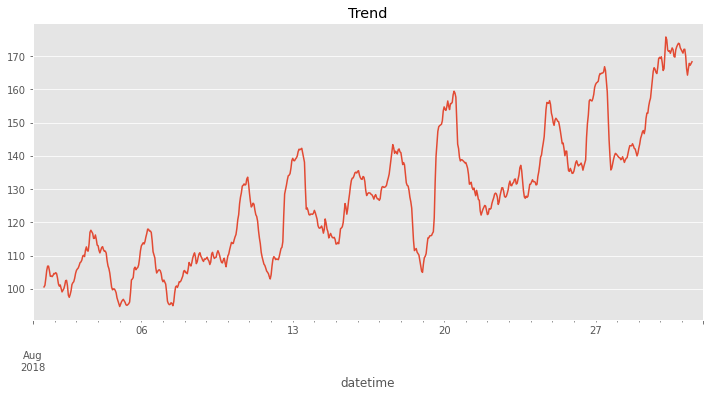

In [9]:
plt.style.use('ggplot')
decomposed = seasonal_decompose(df['2018-08':'2018-08'])
plt.figure(figsize=(12, 12))
plt.subplot(211)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

Трэнд показывает линейный рост количества заказов со временем. Построим тренд для всего временного ряда, чтобы увидеть полную картину.

Text(0.5, 1.0, 'Trend')

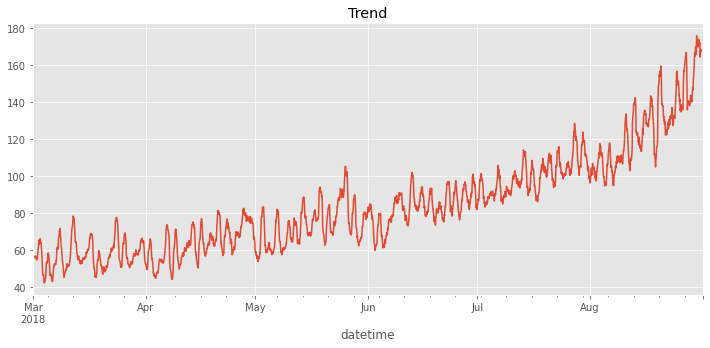

In [10]:
plt.style.use('ggplot')
decomposed = seasonal_decompose(df)
plt.figure(figsize=(12, 5))
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

### Cезонность ``"Seasonality"``

Text(0.5, 1.0, 'Seasonality')

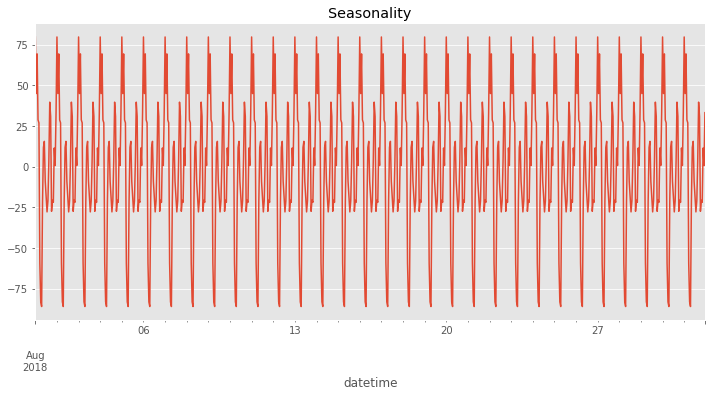

In [11]:
plt.style.use('ggplot')
decomposed = seasonal_decompose(df['2018-08':'2018-08'])
plt.figure(figsize=(12, 12))
plt.subplot(211)

decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

Распределение сезонной части выглядит статическим в интервале суток. Ночью такси почти не заказывают, пик ближе к вечеру.

### Остаток ``"Residuals"``

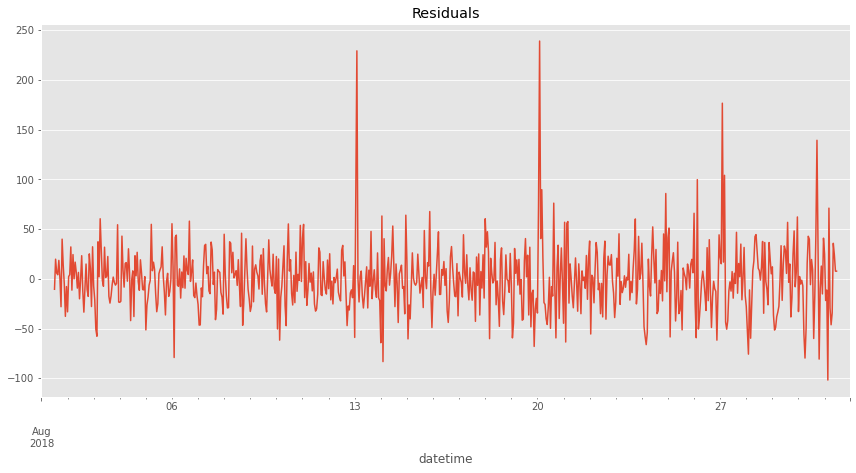

In [12]:
plt.style.use('ggplot')
decomposed = seasonal_decompose(df['2018-08':'2018-08'])
plt.figure(figsize=(12, 12))
plt.subplot(211)

decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

В этой части также присутствует постоянное среднее значение, но периодически возникают большие волны (возможно это вызвано повышенным спросом на такси по выходным или праздничным дням).

### Вывод

Трэнд имеет более сложную зависимость от времени (квадратичная или экспоненциальная). Для текущей задачи будем считать его линейным (предсказания нам потребуются на час вперёд).
Видно, что линия тренда имеет некоторый шум. Возможно, для предсказания будет необходимо применить скользящее среднее с окном в несколько десятков часов.

## Обучение

### Модель ``baseline``

В качестве ``baseline`` модели будем предсказывать новые значения предыдущими:

In [13]:
train, test = train_test_split(df, shuffle=False, test_size=0.2)

train = train.dropna()

pred_previous = test.shift()
pred_previous.iloc[0] = train.iloc[-1]

rmse_base =  mean_squared_error(test['num_orders'], pred_previous) ** 0.5

print("RMSE модели:", round(rmse_base, 3))

RMSE модели: 53.368


Проверим предсказания по среднему значению:

In [14]:
pred_mean = np.ones(test.shape) * train['num_orders'].mean()
print("RMSE модели:", mean_squared_error(test['num_orders'], pred_mean) ** 0.5)

RMSE модели: 74.42015786913375


Предсказания по первому значению показывают результат лучше чем по среднему, поэтому возьмём их в качестве baseline.

### Функция обучающих признаков

Напишем функцию для создания обучающих признаков. Создадим признаки ``day`` (день) и ``dayofweek`` (день недели). А также признаки для скользящего среднего ``rolling_mean`` (с размером окна ``rolling_mean_size``), и ``lag_i`` для признаков отстающего значения.

In [15]:
def function_training_features(data, max_lag, rolling_mean_size):
    df = data.copy()
    df['dayofweek'] = df.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    return df

In [16]:
df_func = function_training_features(df, 30, 50)

### Линейная регрессия

Обучим линейную регрессию и как сказано в задании разделим данные в соотношении 9:1 (10% тестовой выборки).

In [17]:
train, test = train_test_split(df_func, shuffle=False, test_size=0.2)
train = train.dropna()

In [18]:
# выведем первые пять строк таблицы
train.head()

,num_orders,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-03 02:00:00,25,5,108.0,163.0,72.0,119.0,101.0,93.0,49.0,89.0,...,20.0,64.0,75.0,120.0,90.0,58.0,113.0,66.0,61.0,62.82
2018-03-03 03:00:00,64,5,25.0,108.0,163.0,72.0,119.0,101.0,93.0,49.0,...,11.0,20.0,64.0,75.0,120.0,90.0,58.0,113.0,66.0,60.84
2018-03-03 04:00:00,44,5,64.0,25.0,108.0,163.0,72.0,119.0,101.0,93.0,...,11.0,11.0,20.0,64.0,75.0,120.0,90.0,58.0,113.0,60.42
2018-03-03 05:00:00,15,5,44.0,64.0,25.0,108.0,163.0,72.0,119.0,101.0,...,7.0,11.0,11.0,20.0,64.0,75.0,120.0,90.0,58.0,59.88
2018-03-03 06:00:00,9,5,15.0,44.0,64.0,25.0,108.0,163.0,72.0,119.0,...,46.0,7.0,11.0,11.0,20.0,64.0,75.0,120.0,90.0,58.86


Рассчитаем RMSE на обучающей и тестовой выборках:

In [19]:
X_train = train.drop('num_orders', axis = 1)
y_train = train['num_orders']
X_test = test.drop('num_orders', axis = 1)
y_test = test['num_orders']

lm = LinearRegression()
lm.fit(X_train, y_train)
preds_train = lm.predict(X_train)
print("RMSE на обучающей выборке:", mean_squared_error(y_train, preds_train) ** 0.5)

preds_test = lm.predict(X_test)
print("RMSE на тестовой выборке: ", mean_squared_error(y_test, preds_test) ** 0.5)

RMSE на обучающей выборке: 24.107441665527308
RMSE на тестовой выборке:  39.82156637969243


## Тестирование

Попробуем подобрать параметры для линейной регрессии более точно:

In [20]:
%%time
best_lag_lm = 0
best_roll_size_lm = 0
best_rmse_lm = 48
for lag in range(1, 101, 5):
    for roll_size in range(1, 101, 5):

        df_func = function_training_features(df, lag, roll_size)
        train, test = train_test_split(df_func, shuffle=False, test_size=0.2)
        train = train.dropna()
        X_train = train.drop('num_orders', axis = 1)
        y_train = train['num_orders']
        X_test = test.drop('num_orders', axis = 1)
        y_test = test['num_orders']

        lm = LinearRegression()
        lm.fit(X_train, y_train)

        preds_test = lm.predict(X_test)
        rmse = mean_squared_error(y_test, preds_test) ** 0.5
        # Значение метрики RMSE на тестовой выборке должно быть не больше 48
        if rmse < best_rmse_lm :
            best_rmse_lm = rmse
            best_lag_lm = lag
            best_roll_size_lm = roll_size
            
print(f"RMSE на тестовой выборке: {best_rmse_lm} \
        \nМаксимальное смещение: {best_lag_lm} \
        \nРазмер скользящего окна: {best_roll_size_lm}\n")

RMSE на тестовой выборке: 35.69311306439486         
Максимальное смещение: 96         
Размер скользящего окна: 16

CPU times: user 54.6 s, sys: 50.1 s, total: 1min 44s
Wall time: 1min 44s


### Функция ``main_model``

Напишем функцию и обучим модели ``Lasso`` и ``Ridge``.

In [21]:
def main_model(model):
    best_lag = 0
    best_roll_size = 0
    best_alpha = 0
    best_rmse = 48
    for lag in range(1, 101, 5):
        for roll_size in range(1, 101, 5):
            for alpha in np.arange(0.1, 1, 0.2):

                df_func = function_training_features(df, lag, roll_size)
                train, test = train_test_split(df_func, shuffle=False, test_size=0.2)
                train = train.dropna()
                X_train = train.drop('num_orders', axis = 1)
                y_train = train['num_orders']
                X_test = test.drop('num_orders', axis = 1)
                y_test = test['num_orders']
                
                if model == 'Lasso' :
                    lm = Lasso(alpha=alpha)
                elif model == 'Ridge' :
                    lm = Ridge(alpha=alpha)
                lm.fit(X_train, y_train)

                preds_test = lm.predict(X_test)
                rmse = mean_squared_error(y_test, preds_test) ** 0.5
                if rmse < best_rmse :
                    best_rmse = rmse
                    best_lag = lag
                    best_roll_size = roll_size
                    best_alpha = alpha
    return best_rmse, best_lag, best_roll_size, best_alpha

### Модель ``Lasso``

In [22]:
%%time
best_rmse_ls, best_lag_ls, best_roll_size_ls, best_alpha_ls = main_model("Lasso")
print(f"RMSE на тестовой выборке: {best_rmse_ls} \
        \nМаксимальное смещение {best_lag_ls} \
        \nРазмер скользящего окна {best_roll_size_ls}\n")
print(f"Коэффициент регуляризации: {best_alpha_ls}")

RMSE на тестовой выборке: 35.67281060216996         
Максимальное смещение 96         
Размер скользящего окна 41

Коэффициент регуляризации: 0.9000000000000001
CPU times: user 6min 54s, sys: 6min 1s, total: 12min 55s
Wall time: 12min 56s


### Модель ``Ridge``

In [23]:
%%time
best_rmse_rg, best_lag_rg, best_roll_size_rg, best_alpha_rg = main_model("Ridge")
print(f"RMSE на тестовой выборке: {best_rmse_rg} \
        \nМаксимальное смещение {best_lag_rg} \
        \nРазмер скользящего окна {best_roll_size_rg}\n")
print(f"Коэффициент регуляризации: {best_alpha_rg}")

RMSE на тестовой выборке: 35.694169666362185         
Максимальное смещение 96         
Размер скользящего окна 1

Коэффициент регуляризации: 0.1
CPU times: user 3min 38s, sys: 3min 4s, total: 6min 43s
Wall time: 6min 43s


### Анализ результатов

Соберём данные в таблицу и проанализируем результат:

In [25]:
stats = pd.DataFrame([['Baseline', round(rmse_base, 3), 1, 0, np.nan],
                      ['Linear Regression', round(best_rmse_lm, 3), best_lag_lm, best_roll_size_lm, np.nan],
                      ['Lasso', round(best_rmse_ls, 3), best_lag_ls, best_roll_size_ls, best_alpha_ls],
                      ['Ridge', round(best_rmse_rg, 3), best_lag_rg, best_roll_size_rg, best_alpha_rg]],
                    columns = ['model', 'rmse', 'max_lag', 'roll_size', 'alpha'])
# выведем таблицу
display(stats)

,model,rmse,max_lag,roll_size,alpha
0,Baseline,53.368,1,0,NaN
1,Linear Regression,35.693,96,16,NaN
2,Lasso,35.673,96,41,0.9
3,Ridge,35.694,96,1,0.1


Для предсказаний модели ``Lasso`` с параметром регуляризации ``alpha=0.9`` построим графики зависимостей целевого признака и предсказаний от времени. Проверим, в какие моменты модель была более точной и менее точной. Для наглядности графика построим последние 10 дней.

In [26]:
df_func = function_training_features(df, 96, 41)
train, test = train_test_split(df_func, shuffle=False, test_size=0.2)
train = train.dropna()
X_train = train.drop('num_orders', axis = 1)
y_train = train['num_orders']
X_test = test.drop('num_orders', axis = 1)
y_test = test['num_orders']

lasso = Lasso(alpha=0.9)
lasso.fit(X_train, y_train)
preds_test = pd.Series(lasso.predict(X_test), index = y_test.index, name='preds')

In [27]:
df_preditors = pd.concat([y_test, preds_test], axis=1)
df_preditors.head(10)

,num_orders,preds
datetime,,
2018-07-26 04:00:00,131,127.387869
2018-07-26 05:00:00,83,75.378455
2018-07-26 06:00:00,21,48.722166
2018-07-26 07:00:00,39,65.843009
2018-07-26 08:00:00,80,61.754457
2018-07-26 09:00:00,138,109.017315
2018-07-26 10:00:00,142,92.892337
2018-07-26 11:00:00,86,107.615540
2018-07-26 12:00:00,102,114.649062


<AxesSubplot:xlabel='datetime', ylabel='num_orders'>

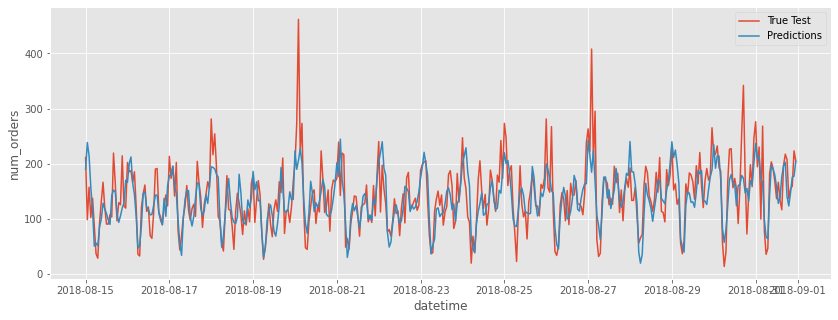

In [28]:
plt.figure(figsize=(14, 5))
plt.style.use('ggplot')
data = df_preditors['2018-08-15':]
sns.lineplot(x=data.index, y=data['num_orders'], label='True Test')
sns.lineplot(x=data.index, y=data['preds'], label='Predictions')

Видим, что модель отлично определяет тестовые данные, но испытывает проблемы с редкими большими значениями.

## Общий вывод

В процессе проведения исследовательского анализа данных мы открыли и изучили файл, проанализировали данные. Написали функции для обучения и тестирования моделей. Выяснили, что линейные модели показали практически одинаковый результат по RMSE. Наилучшие результаты даёт скользящее окно размером примерно ``40-50 часов``. Модель ``Lasso`` получила заметно меньшее ``RMSE`` по сравнению с базовой моделью. И в итоге мы  увидели, что модель отлично определяет тестовые данные, но испытывает проблемы с редкими большими значениями.